In [8]:
import numpy as np
from numba import jit
import pints
import pints.plot
import pints_smol_moments_4_normalised_jit as toy
import matplotlib.pyplot as plt



Select the desired model, true parameters and time array.

Then simulate to get synthetic data

In [9]:

model = toy.SmolModel(None,None)


true_parameters = [0.0004, 500]


times = np.linspace(0, 97, 9700)

org_values = model.simulate(true_parameters, times)

print(org_values)

print(org_values.shape)


[[5.00000000e+00 2.47500000e+03 9.84937059e+00 9.80101010e+01]
 [4.99500448e+00 2.46507634e+03 9.84935555e+00 9.80099054e+01]
 [4.99001893e+00 2.45520715e+03 9.84931060e+00 9.80093202e+01]
 ...
 [4.67399466e-01 8.52548693e-01 2.50524209e+00 8.76168630e+00]
 [4.67355796e-01 8.52284303e-01 2.50507809e+00 8.76076930e+00]
 [4.67312135e-01 8.52020017e-01 2.50491411e+00 8.75985249e+00]]
(9700, 4)


Add noise to the data (using random sampling from normal distribution)

In [10]:

noise = 0
# values = org_values + noise * np.random.normal(0, 0.25, org_values.shape))
values = org_values *(1 + noise * np.random.normal(0, 1, org_values.shape))
# values = np.log(org_values) + noise * np.random.normal(0, 1, org_values.shape)
# values = np.exp(values)

# size_noise = 4
# noise_value = 6
# # # Create a list with the specified size filled with a placeholder value
# noise_arr = [noise_value for _ in range(size_noise)]


Set-up pints problem and log likelihoods

In [11]:

problem = pints.MultiOutputProblem(model, times, values)



log_likelihood = pints.GaussianLogLikelihood(problem)
# log_likelihood_2 = pints.GaussianIntegratedLogUniformLogLikelihood(problem)

print('Original problem dimension: ' + str(problem.n_parameters()))
print('New dimension: ' + str(log_likelihood.n_parameters()))
# print('New dimension: ' + str(log_likelihood_2.n_parameters()))

true_parameters += noise_arr
# # print(true_parameters)



Original problem dimension: 2
New dimension: 6


Create uniform log prior

In [12]:

# # Define the size of the list
size = 6
placeholder_lower_value = 0
placeholder_upper_value = 100
 
# # Create a list with the specified size filled with a placeholder value
prior_arr_lower = [placeholder_lower_value for _ in range(size)]
prior_arr_upper = [placeholder_upper_value for _ in range(size)]
prior_arr_lower[0] = 0.0001
prior_arr_upper[0] = 0.001
prior_arr_lower[1] = 100
prior_arr_upper[1] = 1000

# log_prior = pints.UniformLogPrior(
#     [0.000001, 1],
#     [0.01, 10000]
#     )
log_prior = pints.UniformLogPrior(
    prior_arr_lower,
    prior_arr_upper
    )

# Create a posterior log-likelihood (log(likelihood * prior))
# log_posterior = pints.LogPosterior(log_likelihood_2, log_prior)
log_posterior = pints.LogPosterior(log_likelihood, log_prior)


/var/folders/lt/9g_w308946v4x_5mqxc951qr0000gr/T/ipykernel_59631/3693381286.py:18: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  log_prior = pints.UniformLogPrior(


In [13]:

xs = [
    np.array(true_parameters) * 0.9,
    np.array(true_parameters) * 1.05,
    np.array(true_parameters) * 1.15,
]

chains = pints.mcmc_sample(log_posterior, 3, xs)

print(chains)

# xs = [
#     np.array(true_parameters) * 0.9,
#     np.array(true_parameters) * 1.05,
#     np.array(true_parameters) * 1.15,
# ]
# ITERS = 100
# mcmc = pints.MCMCController(log_posterior, 3, xs, method=pints.SliceDoublingMCMC)
# mcmc.set_max_iterations(ITERS)
# chains = mcmc.run()
# print(chains)



Using Haario-Bardenet adaptive covariance MCMC
Generating 3 chains.
Running in sequential mode.
Iter. Eval. Accept.   Accept.   Accept.   Time m:s
0     3      0         0         0          0:00.1
1     6      0         0         0          0:00.1
2     9      0         0         0          0:00.1
3     12     0         0         0          0:00.1
20    63     0         0         0          0:00.5
40    123    0         0         0          0:00.8
60    183    0.0164    0         0          0:01.0
80    243    0.0123    0.0123    0          0:01.2
100   303    0.0099    0.0099    0          0:01.4
120   363    0.00826   0.00826   0          0:01.6
140   423    0.00709   0.00709   0          0:01.7
160   483    0.00621   0.00621   0          0:01.9
180   543    0.00552   0.00552   0          0:02.2
Initial phase completed.
200   603    0.00995   0.00498   0          0:02.4
220   663    0.0136    0.0181    0.00905    0:03.5
240   723    0.0249    0.0249    0.0166     0:04.7
260   783   

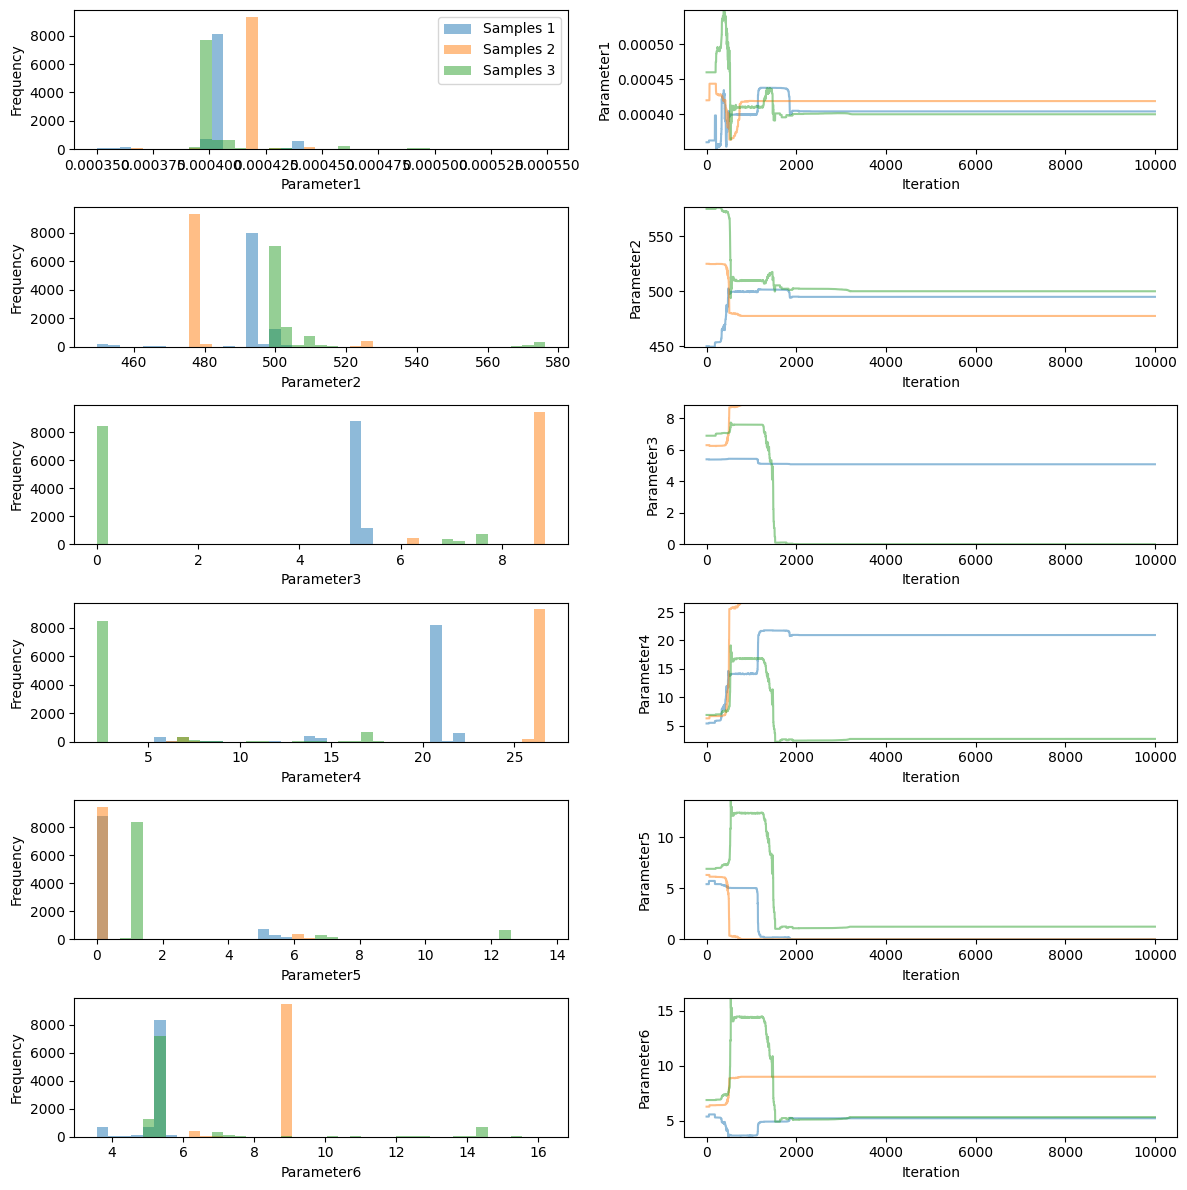

In [15]:

pints.plot.trace(chains)
plt.savefig("mcmc.png")
plt.show()

Perfect data

In [23]:
problem = pints.MultiOutputProblem(model, times, values)
log_likelihood = pints.GaussianLogLikelihood(problem)
log_prior = pints.UniformLogPrior(
    [0.0001, 100],
    [0.001, 2000]
    )
xs = [
    np.array(true_parameters) * 0.9,
    np.array(true_parameters) * 1.05,
    np.array(true_parameters) * 1.15,
]
ITERS = 100
mcmc = pints.MCMCController(log_posterior, 3, xs, method=pints.SliceDoublingMCMC)
mcmc.set_max_iterations(ITERS)
chains = mcmc.run()
print(chains)

/var/folders/lt/9g_w308946v4x_5mqxc951qr0000gr/T/ipykernel_59631/3605161192.py:3: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  log_prior = pints.UniformLogPrior(


Using Slice Sampling - Doubling
Generating 3 chains.
Running in sequential mode.
Iter. Eval. Time m:s
0     3       0:00.1
1     372     0:06.3
2     732     0:11.7
3     1143    0:17.5


KeyboardInterrupt: 

In [ ]:
pints.plot.trace(chains)
plt.savefig("mcmc.png")
plt.show()

Multiplicative noise

In [ ]:
noise = 1
values = org_values *(1 + noise * np.random.normal(0, 1, org_values.shape))
problem = pints.MultiOutputProblem(model, times, values)
log_likelihood = pints.GaussianLogLikelihood(problem)
log_prior = pints.UniformLogPrior(
    [0.0001, 1],
    [0.001, 10000]
    )
xs = [
    np.array(true_parameters) * 0.9,
    np.array(true_parameters) * 1.05,
    np.array(true_parameters) * 1.15,
]
ITERS = 100
mcmc = pints.MCMCController(log_posterior, 3, xs, method=pints.SliceDoublingMCMC)
mcmc.set_max_iterations(ITERS)
chains = mcmc.run()
print(chains)

In [ ]:
pints.plot.trace(chains)
plt.savefig("mcmc.png")
plt.show()

Additive noise

In [ ]:
noise = 1
values = org_values + noise * np.random.normal(0, 0.25, org_values.shape)
problem = pints.MultiOutputProblem(model, times, values)
log_likelihood = pints.GaussianLogLikelihood(problem)
log_prior = pints.UniformLogPrior(
    [0.0001, 1],
    [0.001, 10000]
    )
xs = [
    np.array(true_parameters) * 0.9,
    np.array(true_parameters) * 1.05,
    np.array(true_parameters) * 1.15,
]
ITERS = 100
mcmc = pints.MCMCController(log_posterior, 3, xs, method=pints.SliceDoublingMCMC)
mcmc.set_max_iterations(ITERS)
chains = mcmc.run()
print(chains)

In [ ]:
pints.plot.trace(chains)
plt.savefig("mcmc.png")
plt.show()